In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy import linalg as la
import matplotlib.pyplot as plt


#Make your training and test data
train = pd.read_csv('../archive/mnist_train.csv')
test = pd.read_csv('../archive/mnist_test.csv')

In [6]:
#turn your outputs to one hot and transform your inputs 
onehotencoder = OneHotEncoder(categories='auto')
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train.values[:,1:])
y_train = onehotencoder.fit_transform(train.values[:,:1]).toarray()
X_test = scaler.fit_transform(test.values[:,1:])
y_test = onehotencoder.fit_transform(test.values[:,:1]).toarray()


TypeError: memoryview: invalid slice key

In [4]:
#set input size
input_size = X_train.shape[1]

#set hidden neurons
hidden_size = 1000

#intialize input weights (gaussian distribution)
#input_weights =  np.random.normal(size=[input_size,hidden_size])
#biases = np.random.normal(size=[hidden_size])

In [5]:
def relu(x):
    return np.maximum(x,0,x)

def hidden_nodes(x):
    G = np.dot(x,input_weights)
    G=G+biases
    H=relu(G)
    return H

In [8]:
output_weights_pinv= np.dot(la.pinv(hidden_nodes(X_train)),y_train)





In [6]:
def take_SVD(x):
# compute the SVD of the matrix
    U, s, Vt = np.linalg.svd(hidden_nodes(x), full_matrices=False)

    # compute the pseudoinverse of s
    s_inv = np.diag(np.reciprocal(s, where=(s!=0)))
    """
    This part was confusing at first, SVD maps in space """


    # compute the output weights
    output_weights_SVD = np.dot(Vt.T, np.dot(s_inv, np.dot(U.T, y_train)))
    return output_weights_SVD 

In [7]:
def predict_test(X):
    out = hidden_nodes(X)
    out_SVD= np.dot(out,take_SVD(X_train))
    out_pinv = np.dot(out,output_weights_pinv)
    return out_SVD, out_pinv

def predict(X):
    out = hidden_nodes(X)
    out_SVD= np.dot(out,take_SVD(X_train))
    return out_SVD

Accuracy of  1000 nodes is:  0.9473
Accuracy of  1500 nodes is:  0.952
Accuracy of  2000 nodes is:  0.9565
Accuracy of  2500 nodes is:  0.965
Accuracy of  3000 nodes is:  0.966
Accuracy of  3500 nodes is:  0.9679
Accuracy of  4000 nodes is:  0.9697
Accuracy of  4500 nodes is:  0.9713
Accuracy of  5000 nodes is:  0.9736
Accuracy of  5500 nodes is:  0.9742


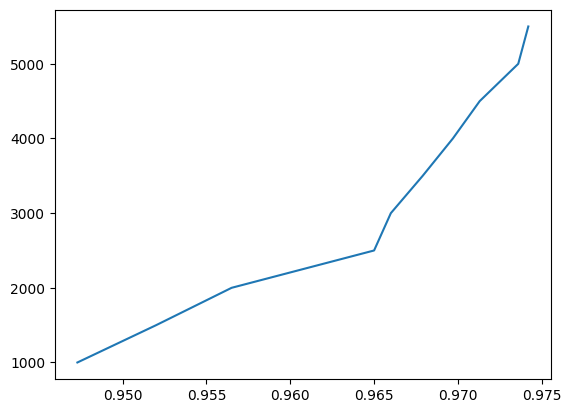

In [8]:
total= X_test.shape[0]
num_atttemps = 10
SVD_data = []
hidden_data = []
for i in range(num_atttemps):
    input_weights =  np.random.normal(size=[input_size,hidden_size])
    biases = np.random.normal(size=[hidden_size])
    prediction_SVD = predict(X_test)
    correct_SVD=0
    for i in range(total):
        predicted_SVD= np.argmax(prediction_SVD[i])
        actual = np.argmax(y_test[i])
        correct_SVD +=1 if predicted_SVD == actual else 0
    accuracy_SVD = correct_SVD/total
    SVD_data.append(accuracy_SVD)
    hidden_data.append(hidden_size)
    print('Accuracy of ', hidden_size, 'nodes is: ', accuracy_SVD)
    hidden_size += 500
plt.plot(SVD_data,hidden_data)
plt.show()


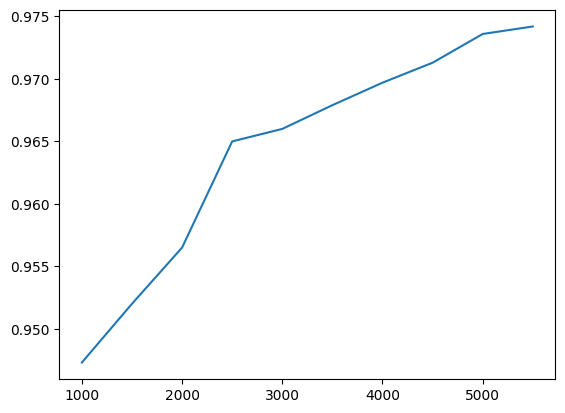

In [9]:
plt.plot(hidden_data,SVD_data)
plt.show()

In [10]:
prediction_SVD,prediction_pinv = predict_test(X_test)
correct_pinv = 0
correct_SVD=0
total=X_test.shape[0]

for i in range(total):
    predicted_SVD = np.argmax(prediction_SVD[i])
    predicted_pinv = np.argmax(prediction_SVD[i])
    actual = np.argmax(y_test[i])
    correct_SVD +=1 if predicted_SVD == actual else 0
    correct_pinv +=1 if predicted_pinv == actual else 0

accuracy_SVD = correct_SVD/total
accuracy_pinv = correct_pinv/total
print('Accuracy for SVD with', hidden_size, 'hidden neurons', accuracy_SVD)
print('Accuracy for pinv with', hidden_size, 'hidden neurons', accuracy_pinv)
if predicted_pinv == predicted_SVD:
    print("they are the same")
else:
    print("well they're not the exact same")

Accuracy for SVD with 1000 hidden neurons 0.9445
Accuracy for pinv with 1000 hidden neurons 0.9445
they are the same


In [19]:
prediction_train = hidden_nodes(X_train)
correct_train=0
total=X_test.shape[0]

for i in range(total):
    predicted_train = np.argmax(prediction_train[i])
    actual = np.argmax(y_train[i])
    correct_train +=1 if predicted_train == actual else 0
    
accuracy_train = correct_train/total

In [29]:
print('Size of (X_train•input_weights) weights: ',np.shape(hidden_nodes(X_train)))
print('Size of output weights: ',np.shape(output_weights_SVD))
print(prediction_SVD[6009])
print('Predicted: ',np.argmax(prediction_SVD[6009]))
print('Actual: ',np.argmax(y_test[6009]))
print('Size of output')

Size of (X_train•input_weights) weights:  (60000, 1000)
Size of output weights:  (1000, 10)
[-0.047852   -0.04071285 -0.03426444  0.5494383  -0.06999806  0.3480605
  0.01487411  0.0416908   0.1330521   0.10986823]
Predicted:  3
Actual:  3
Size of output


[12.90260154  0.          0.          5.25436288  0.          5.37140755
  9.01924057  0.          7.03812028  0.          0.          0.
  4.03331861  0.          8.23883841 14.80675323  3.79808152  0.
  9.6281759  11.89657256 19.4573182   0.          0.          4.25475521
  0.          3.87961999  0.          1.56465927  0.          0.24107923
 14.08214152  4.66731259 11.78042469  0.          0.          0.
  0.          0.          0.          9.14785388 10.03700409  0.
  0.          0.          5.59910998  3.18727525  0.          0.
  0.          0.          0.          0.          0.          8.2278667
 12.08128918 16.95283386  0.         11.823422    0.          0.
 11.3193808   5.37853389 10.26255131 10.81729783  0.          3.61212977
  1.92937832  1.63682683  0.          6.5609619   0.          0.
  0.          0.          2.22955998  0.          0.          0.
  0.          0.          7.76251725  7.58979987 11.61552856  7.43335757
  6.97196714  7.27336981  3.10913632  0.042